<a href="https://colab.research.google.com/github/meenakumkum/Efficient-Age-Estimation-from-Facial-Images-Using-Machine-Learning/blob/main/FACE_Age_Detection_From_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
import os , glob
from PIL import Image
import shutil

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kumkummeena","key":"0c4463b5a41d3492a5a9435c7cb16e5e"}'}

In [ ]:
mkdir -p /root/.kaggle

In [ ]:
! cp 'kaggle (1) (1).json' ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle (1) (1).json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d arashnic/faces-age-detection-dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
import os
os.listdir("/content")


['.config', 'kaggle.json', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content

 drive	'faces-age-detection-dataset (1).zip'   kaggle.json   sample_data


In [ ]:
!unzip "/content/faces-age-detection-dataset (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: faces/Train/7917.jpg    
  inflating: faces/Train/7918.jpg    
  inflating: faces/Train/7919.jpg    
  inflating: faces/Train/792.jpg     
  inflating: faces/Train/7921.jpg    
  inflating: faces/Train/7922.jpg    
  inflating: faces/Train/7925.jpg    
  inflating: faces/Train/7926.jpg    
  inflating: faces/Train/7927.jpg    
  inflating: faces/Train/7928.jpg    
  inflating: faces/Train/793.jpg     
  inflating: faces/Train/7930.jpg    
  inflating: faces/Train/7931.jpg    
  inflating: faces/Train/7935.jpg    
  inflating: faces/Train/7936.jpg    
  inflating: faces/Train/7937.jpg    
  inflating: faces/Train/7938.jpg    
  inflating: faces/Train/794.jpg     
  inflating: faces/Train/7940.jpg    
  inflating: faces/Train/7941.jpg    
  inflating: faces/Train/7943.jpg    
  inflating: faces/Train/7944.jpg    
  inflating: faces/Train/7946.jpg    
  inflating: faces/Train/7947.jpg    
  inflating: faces/Train/7948.jpg    

In [ ]:
faces_dir = '/content/faces'
faces_02_dir = '/content/faces_02'

In [ ]:
combined_dir = 'combined'
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
def copy_and_label(src_dir, label, combined_dir):
    for filename in os.listdir(src_dir):
        file_path = os.path.join(src_dir, filename)
        if os.path.isfile(file_path):
            new_filename = f"{label}_{filename}"
            new_path = os.path.join(combined_dir, new_filename)
            shutil.copy(file_path, new_path)


In [ ]:
copy_and_label(faces_dir, 'faces', combined_dir)
copy_and_label(faces_02_dir, 'faces_02', combined_dir)

In [ ]:
from pathlib import Path
combined_dir = Path('/content/combined')
all_images = list(combined_dir.glob('*.jpg'))

In [ ]:
labels = [1 if 'faces' in str(img) else 0 for img in all_images]

In [ ]:
def rename_and_store_images(image_list, labels_list):
    data = []
    labels = []
    faces_count = faces_02_count = 1

    for img, label in zip(image_list, labels_list):
        if label == 1:
            new_filename = f"faces_{faces_count:04d}.jpg"
            faces_count += 1
        else:
            new_filename = f"faces_02_{faces_02_count:04d}.jpg"
            faces_02_count += 1

        new_path = os.path.join(combined_dir, new_filename)
        shutil.move(str(img), new_path)
        data.append(new_path)
        labels.append(label)

    return data, labels

In [ ]:
!ls /content

 combined   faces     'faces-age-detection-dataset (1).zip'   sample_data
 drive	    faces_02   kaggle.json


In [ ]:
!ls -lt /content

total 106544
drwxr-xr-x 2 root root      4096 Aug 10 15:10  combined
drwxr-xr-x 3 root root      4096 Aug 10 15:10  faces_02
drwxr-xr-x 3 root root      4096 Aug 10 15:10  faces
-rw-r--r-- 1 root root 109070675 Aug 10 15:10 'faces-age-detection-dataset (1).zip'
drwx------ 5 root root      4096 Aug 10 15:10  drive
-rw-r--r-- 1 root root        67 Aug 10 15:09  kaggle.json
drwxr-xr-x 1 root root      4096 Aug  7 13:42  sample_data


In [ ]:
!ls combined
!ls faces_02
!ls faces

faces_train.csv
part3
Train  train.csv


In [ ]:
!ls faces

Train  train.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/faces/train.csv')
print(df.head())

          ID   Class
0    377.jpg  MIDDLE
1  17814.jpg   YOUNG
2  21283.jpg  MIDDLE
3  16496.jpg   YOUNG
4   4487.jpg  MIDDLE


In [ ]:
!ls /content/faces/Train

0.jpg	   13451.jpg  16856.jpg  20265.jpg  23693.jpg  3228.jpg  6628.jpg
10000.jpg  13452.jpg  16857.jpg  20267.jpg  23694.jpg  3229.jpg  6629.jpg
10001.jpg  13453.jpg  16858.jpg  20268.jpg  23695.jpg  3230.jpg  662.jpg
10004.jpg  13454.jpg  16859.jpg  2026.jpg   23696.jpg  3233.jpg  6630.jpg
10007.jpg  13456.jpg  1685.jpg	 20271.jpg  23698.jpg  3236.jpg  6631.jpg
10008.jpg  13458.jpg  16860.jpg  20272.jpg  23699.jpg  3237.jpg  6633.jpg
10009.jpg  13459.jpg  16861.jpg  20273.jpg  236.jpg    3239.jpg  6634.jpg
10011.jpg  1345.jpg   16863.jpg  20275.jpg  23700.jpg  323.jpg	 6635.jpg
10013.jpg  13460.jpg  16865.jpg  20276.jpg  23701.jpg  3240.jpg  6637.jpg
10015.jpg  13462.jpg  16866.jpg  20277.jpg  23702.jpg  3241.jpg  6639.jpg
10016.jpg  13463.jpg  16869.jpg  20278.jpg  23704.jpg  3242.jpg  663.jpg
10017.jpg  13464.jpg  16870.jpg  20280.jpg  23705.jpg  3243.jpg  6640.jpg
10018.jpg  13465.jpg  16871.jpg  20281.jpg  23706.jpg  3244.jpg  6641.jpg
10019.jpg  13466.jpg  16872.jpg  20282.jpg  

Load & Split Images

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load images and labels from CSV
image_folder = "/content/faces/Train"
csv_path = "/content/faces/train.csv"  # Path to your CSV file
df = pd.read_csv(csv_path)

all_images = []
all_labels = []

# Create a dictionary to map image IDs to labels
label_dict = dict(zip(df['ID'], df['Class']))

for img_name in os.listdir(image_folder):
    if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_folder, img_name)
        try:
            img = Image.open(img_path).convert('RGB').resize((128, 128))
            all_images.append(np.array(img))
            # Get the label from the dictionary using the image name
            all_labels.append(label_dict.get(img_name, 'UNKNOWN')) # Handle cases where image not in CSV
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

# Convert lists to numpy arrays
all_images = np.array(all_images)

# Step 2: Train-test split
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels # Stratify to maintain class distribution
)

Rename & Save Images


In [ ]:
def rename_and_store_images(images, labels, save_dir):
    import os
    from PIL import Image
    os.makedirs(save_dir, exist_ok=True)
    paths, lbls = [], []

    for i, (img, label) in enumerate(zip(images, labels)):
        path = os.path.join(save_dir, f"{label}_{i}.jpg")
        Image.fromarray(img.astype('uint8')).save(path)
        paths.append(path)
        lbls.append(label)

    return paths, lbls

train_data, train_labels = rename_and_store_images(train_images, train_labels, "processed_images/train")
test_data, test_labels = rename_and_store_images(test_images, test_labels, "processed_images/test")


In [ ]:
all_labels = train_labels + test_labels

In [ ]:
label_df = pd.DataFrame(all_labels, columns=['Label'])

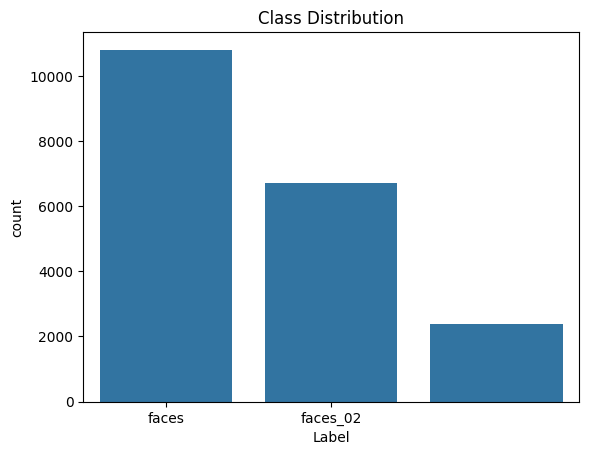

In [ ]:
sns.countplot(x='Label', data=label_df)
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=['faces', 'faces_02'])
plt.show()

In [ ]:
print(f"Total number of images: {len(train_data) + len(test_data)}")
print(f"Number of training images: {len(train_data)}")
print(f"Number of testing images: {len(test_data)}")

Total number of images: 19906
Number of training images: 15924
Number of testing images: 3982


In [ ]:
def get_image_dimensions(image_paths):
    dimensions = []
    for image_path in image_paths:
        with Image.open(image_path) as img:
            dimensions.append(img.size)
    return dimensions

In [ ]:
train_dimensions = get_image_dimensions(train_data)
train_df = pd.DataFrame(train_dimensions, columns=['Width', 'Height'])

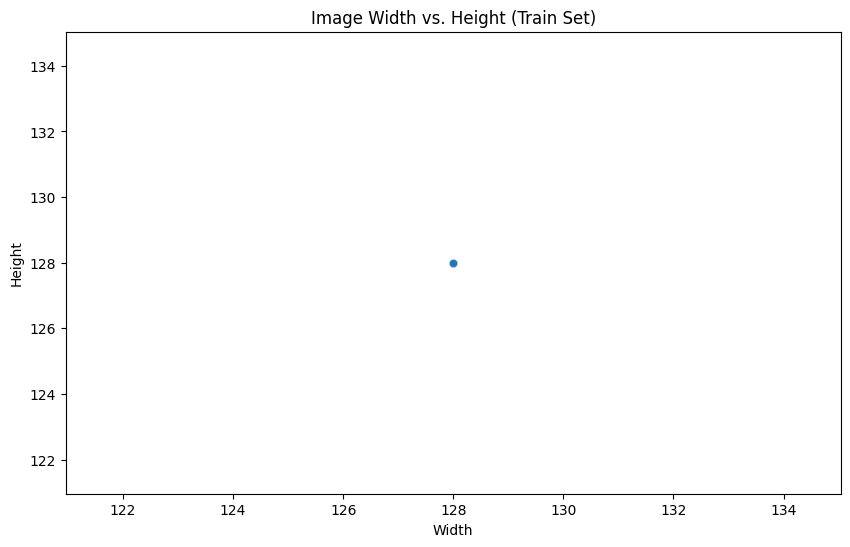

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Height', data=train_df, alpha=0.5)
plt.title('Image Width vs. Height (Train Set)')
plt.show()


In [ ]:
avg_width = train_df['Width'].mean()
avg_height = train_df['Height'].mean()

In [ ]:
print(avg_width)
print(avg_height)

128.0
128.0


In [ ]:
def calculate_brightness(image_path):
    with Image.open(image_path) as img:
        grayscale = img.convert('L')  # Convert to grayscale
        stat = grayscale.getextrema()
        return (stat[1] + stat[0]) / 2

In [ ]:
train_brightness = [calculate_brightness(img) for img in train_data]

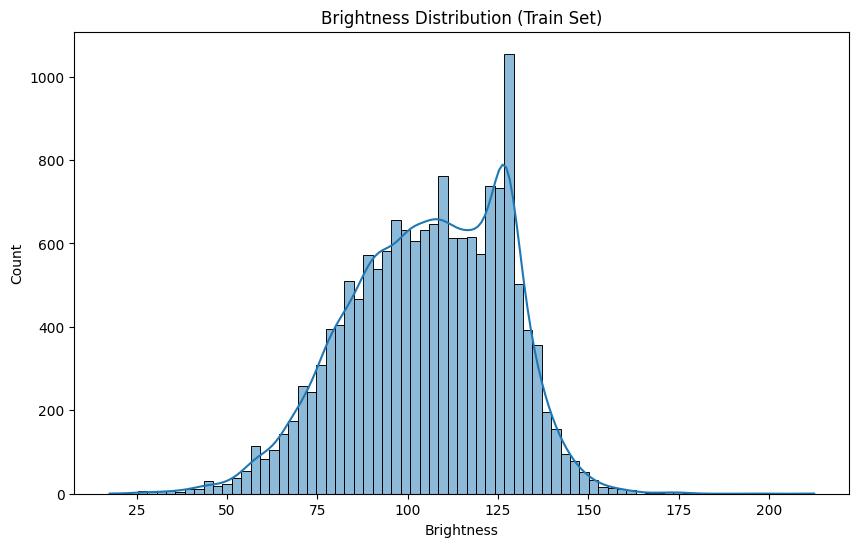

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_brightness, kde=True)
plt.title('Brightness Distribution (Train Set)')
plt.xlabel('Brightness')
plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_new = X_train.reshape(60000, (28*28))
X_test_new = X_test.reshape(10000, (28*28))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_new, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8079 - loss: 0.7290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9133 - loss: 0.3103
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9202 - loss: 0.2884
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9239 - loss: 0.2730
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9243 - loss: 0.2694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9281 - loss: 0.2598
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9284 - loss: 0.2590
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9290 - loss: 0.2518
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9310 - loss: 0.2509
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9312 - loss: 0.2510


In [ ]:
loss, accuracy = model.evaluate(X_train_new, y_train)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9330 - loss: 0.2448
Training Accuracy: 93.26%


In [ ]:
print(f"Training Loss: {loss:.4f}")

Training Loss: 0.2460


In [ ]:
# Evaluate the model on the training data
loss, accuracy = model.evaluate(X_train_new, y_train)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9330 - loss: 0.2448
Test Accuracy: 93.26%


In [ ]:
print(f"Test Loss: {loss:.4f}")

Test Loss: 0.2460


In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels1)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    7,    2,    2,    1],
       [   0, 1106,    4,    2,    0,    1,    4,    2,   16,    0],
       [   4,    8,  928,   15,    6,    6,   13,    8,   40,    4],
       [   3,    0,   18,  909,    1,   31,    2,   10,   30,    6],
       [   1,    1,    6,    2,  907,    0,   10,    4,   12,   39],
       [   8,    2,    2,   24,    8,  785,   13,    6,   37,    7],
       [  10,    3,    9,    1,    7,   12,  911,    1,    4,    0],
       [   1,    6,   26,    4,    5,    1,    0,  942,    3,   40],
       [   4,    6,    6,   13,    8,   18,    8,    7,  896,    8],
       [   9,    5,    1,    6,   20,    7,    0,   15,   14,  932]],
      dtype=int32)>

<Axes: >

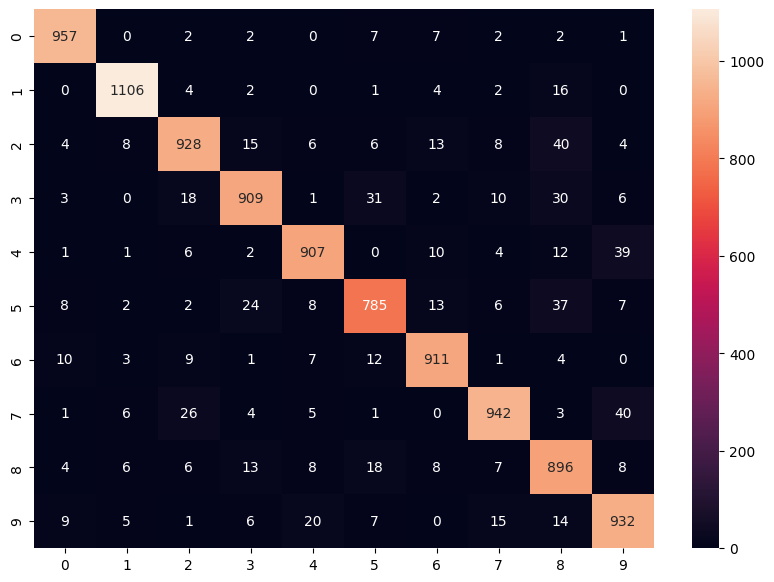

In [ ]:
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')

In [ ]:
import tensorflow as tf
import keras

model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])


tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)

model1.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model1.fit(X_train_new, y_train, epochs = 10, callbacks = [tb_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7351 - loss: 1.0369
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8979 - loss: 0.3636
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9159 - loss: 0.2979
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9218 - loss: 0.2702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9314 - loss: 0.2416
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9385 - loss: 0.2197
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9423 - loss: 0.2067
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9462 - loss: 0.1919
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9494 - loss: 0.1814
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9526 - loss: 0.1709


In [ ]:
loss, accuracy = model1.evaluate(X_train_new, y_train)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9547 - loss: 0.1615
Training Accuracy: 95.42%


In [ ]:
print(f"Training Loss: {loss:.4f}")

Training Loss: 0.1626


In [ ]:
# Evaluate the model on the training data
loss, accuracy = model1.evaluate(X_train_new, y_train)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.1615
Test Accuracy: 95.42%


In [ ]:
print(f"Test Loss: {loss:.4f}")

Test Loss: 0.1626


In [ ]:
cm1 = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels1)

In [ ]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,512 (310.60 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    7,    2,    2,    1],
       [   0, 1106,    4,    2,    0,    1,    4,    2,   16,    0],
       [   4,    8,  928,   15,    6,    6,   13,    8,   40,    4],
       [   3,    0,   18,  909,    1,   31,    2,   10,   30,    6],
       [   1,    1,    6,    2,  907,    0,   10,    4,   12,   39],
       [   8,    2,    2,   24,    8,  785,   13,    6,   37,    7],
       [  10,    3,    9,    1,    7,   12,  911,    1,    4,    0],
       [   1,    6,   26,    4,    5,    1,    0,  942,    3,   40],
       [   4,    6,    6,   13,    8,   18,    8,    7,  896,    8],
       [   9,    5,    1,    6,   20,    7,    0,   15,   14,  932]],
      dtype=int32)>

<Axes: >

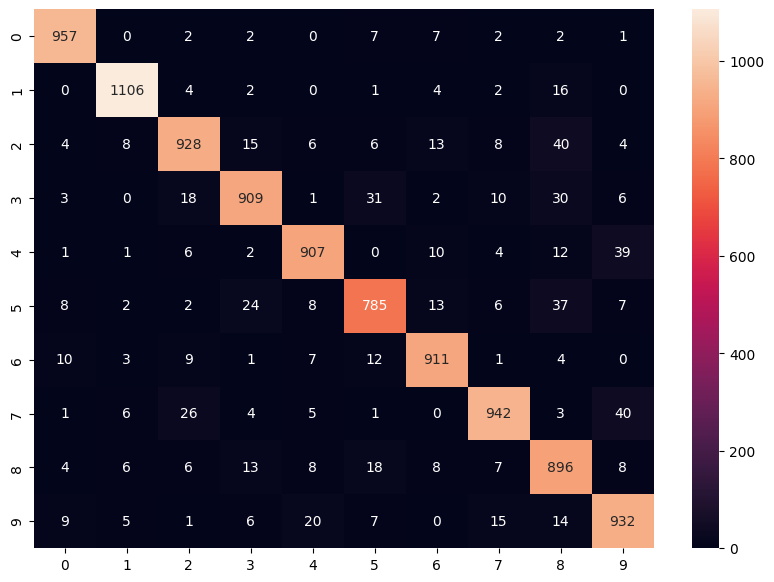

In [ ]:
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.heatmap(cm1, annot = True, fmt = 'd')